# Final plot visualization

This notebook was created for generating the final plot of the sum reduction blog post (the one with xkcd style).

In [1]:
import logging

from matplotlib import patheffects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

logging.getLogger("matplotlib.font_manager").disabled = True

plt.xkcd()
plt.rcParams['path.effects'] = [patheffects.withStroke(linewidth=0)]

In [2]:
elements_size = [32768, 131072, 524288, 2097152, 8388608, 33554432, 134217728, 536870912]

bandwidths = {
    "kernel_0": [26.44, 86.58, 206.62, 344.15, 402.93, 420.44, 428.81, 431.03],
    "kernel_1": [28.41, 86.02, 207.23, 344.57, 403.17, 423.28, 430.88, 434.87],
    "kernel_2": [26.93, 86.01, 207.27, 344.21, 403.72, 423.32, 430.94, 434.73],
    "kernel_3": [28.53, 86.01, 206.40, 347.84, 435.24, 459.18, 473.45, 479.68],
    "kernel_4": [26.39, 85.99, 256.94, 554.55, 725.26, 798.05, 820.73, 842.07],
    "kernel_6": [27.16, 85.42, 256.50, 556.92, 725.20, 797.32, 820.36, 841.93],
    "kernel_7": [25.91, 86.00, 258.65, 559.37, 731.30, 800.64, 820.61, 842.22],
}

In [3]:
# Get % of peak bandwidth
842.22 / 896.064

0.9399105421041355

In [4]:
df = pd.DataFrame(data=bandwidths)
df["element_size"] = elements_size
df["element_size_log"] = np.log2(df["element_size"])
df.head()

,kernel_0,kernel_1,kernel_2,kernel_3,kernel_4,kernel_6,kernel_7,element_size,element_size_log
0,26.44,28.41,26.93,28.53,26.39,27.16,25.91,32768,15.0
1,86.58,86.02,86.01,86.01,85.99,85.42,86.00,131072,17.0
2,206.62,207.23,207.27,206.40,256.94,256.50,258.65,524288,19.0
3,344.15,344.57,344.21,347.84,554.55,556.92,559.37,2097152,21.0
4,402.93,403.17,403.72,435.24,725.26,725.20,731.30,8388608,23.0


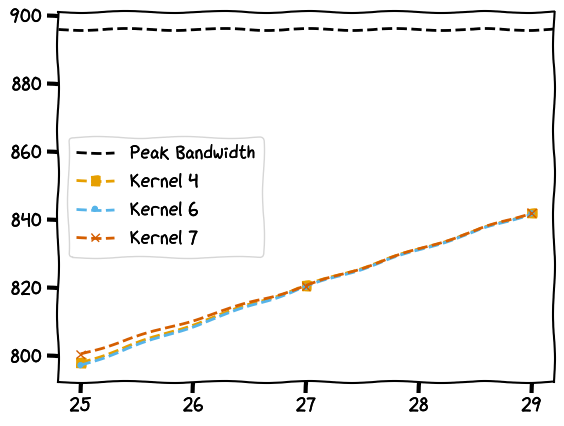

In [14]:
filter_df = df[df["element_size_log"] > 24]
plt.axhline(y=896.064, color="black", linestyle="--", label="Peak Bandwidth")

plt.plot(filter_df["element_size_log"], filter_df["kernel_4"], marker="s", linestyle="--", linewidth=2, color="#E69F00", label="Kernel 4")
plt.plot(filter_df["element_size_log"], filter_df["kernel_6"], marker=".", linestyle="--", linewidth=2, color="#56B4E9", label="Kernel 6")
plt.plot(filter_df["element_size_log"], filter_df["kernel_7"], marker="x", linestyle="--", linewidth=2, color="#D55E00", label="Kernel 7")
# plt.ylabel("Effective memory bandwidth (GB/s)")
# plt.xlabel("Data size (in log2)")
plt.legend()
plt.savefig("zoomed_in_kernel457.png", bbox_inches="tight", dpi=300)
plt.show()

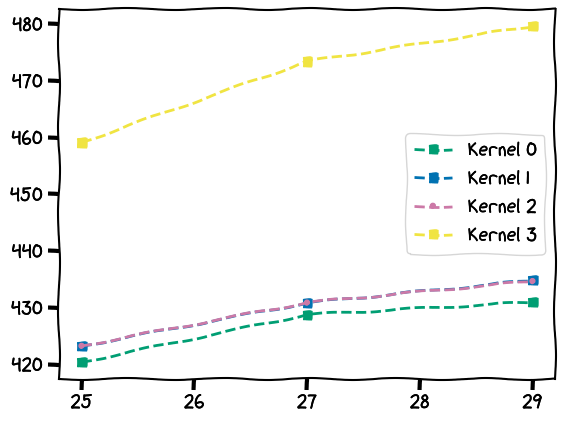

In [15]:
filter_df = df[df["element_size_log"] > 24]
plt.plot(filter_df["element_size_log"], filter_df["kernel_0"], marker="s", linestyle="--", color="#009E73", label="Kernel 0")
plt.plot(filter_df["element_size_log"], filter_df["kernel_1"], marker="s", linestyle="--", color="#0072B2", label="Kernel 1")
plt.plot(filter_df["element_size_log"], filter_df["kernel_2"], marker=".", linestyle="--", color="#CC79A7", label="Kernel 2")
plt.plot(filter_df["element_size_log"], filter_df["kernel_3"], marker="s", linestyle="--", color="#F0E442", label="Kernel 3")
# plt.ylabel("Effective memory bandwidth (GB/s)")
# plt.xlabel("Data size (in log2)")
plt.legend()
plt.savefig("zoomed_in_kernel0123.png", bbox_inches="tight", dpi=300)
plt.show()

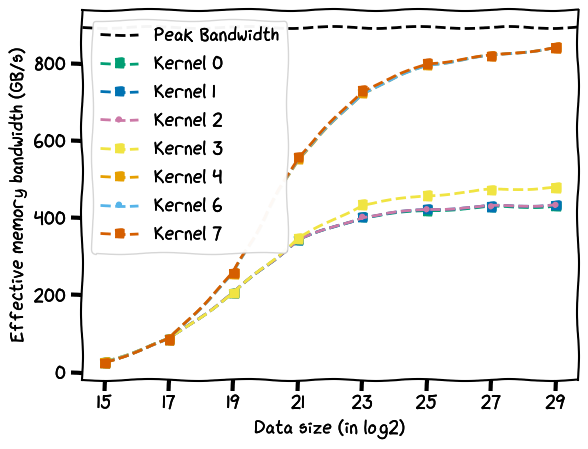

In [16]:
plt.axhline(y=896.064, color="black", linestyle="--", label="Peak Bandwidth")
plt.plot(df["element_size_log"], df["kernel_0"], marker="s", linestyle="--", color="#009E73", label="Kernel 0")
plt.plot(df["element_size_log"], df["kernel_1"], marker="s", linestyle="--", color="#0072B2", label="Kernel 1")
plt.plot(df["element_size_log"], df["kernel_2"], marker=".", linestyle="--", color="#CC79A7", label="Kernel 2")
plt.plot(df["element_size_log"], df["kernel_3"], marker="s", linestyle="--", color="#F0E442", label="Kernel 3")
plt.plot(df["element_size_log"], df["kernel_4"], marker="s", linestyle="--", linewidth=2, color="#E69F00", label="Kernel 4")
plt.plot(df["element_size_log"], df["kernel_6"], marker=".", linestyle="--", linewidth=2, color="#56B4E9", label="Kernel 6")
plt.plot(df["element_size_log"], df["kernel_7"], marker="s", linestyle="--", linewidth=2, color="#D55E00", label="Kernel 7")
plt.ylabel("Effective memory bandwidth (GB/s)")
plt.xlabel("Data size (in log2)")
plt.xticks(df["element_size_log"])
plt.legend()
plt.savefig("all_kernels.png", bbox_inches="tight", dpi=300)
plt.show()